In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [3]:
from IPython.core.display import HTML
pd.set_option('html', True)
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [6]:
type(boston)

sklearn.datasets.base.Bunch

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [11]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston_df = pd.DataFrame(boston.data)

In [6]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
boston.target[1:5] # included in the dataset(train dataset)

array([ 21.6,  34.7,  33.4,  36.2])

In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Regression in Sklearn:
We have to drop the price column (defined as testing set y) and all other features will be our training set (X)

In [11]:
from sklearn.linear_model import LinearRegression
X = boston_df.drop('Price',axis = 1)
#Linear regression object
lm = LinearRegression()


In [12]:
lm.fit(X, boston_df.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:

print 'Estimated coefficients', lm.coef_

Estimated coefficients [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [14]:
print 'Estimated intercept', lm.intercept_

Estimated intercept 36.4911032804


In [15]:
coef_table = pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'Estimated_coefficients'])

In [16]:
coef_table

,features,Estimated_coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


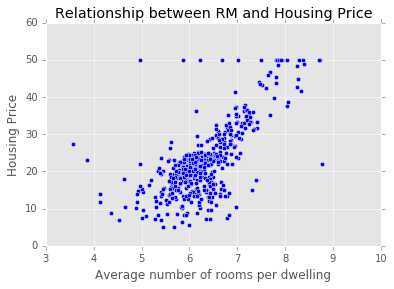

In [17]:
plt.scatter(boston_df.RM, boston_df.Price)
#plt.xlim(0, 20)
#plt.ylim(0,80)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Housing Price')
plt.show()

In [18]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

In [19]:
boston_df['Predicted_Price'] = lm.predict(X)
boston_df['Error'] = boston_df.Price - boston_df.Predicted_Price

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,Predicted_Price,Error
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.008213,-6.008213
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.029861,-3.429861
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.570232,4.129768
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.608141,4.791859
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.942882,8.257118


In [86]:
np.mean((boston_df.Error)**2)

21.897779217687486

In [22]:
import statsmodels.formula.api as sm
result = sm.OLS( boston_df.Price, X ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Thu, 25 Aug 2016   Prob (F-statistic):               0.00
Time:                        20:49:08   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008        -0.159    -0.024
ZN             0.0487      0.014      3.379      0.001         0.020     0.077
INDUS         -0.0038      0.064     -0.059      0.953        -0.130     0.123
CHAS           2.8564      0.904      3.160      0.002         1.080     4.633
NOX           -2.8808      3.359     -0.858      0.392        -9.481     3.720
RM             5.9252      0.309     19.168      0.000         5.318     6.533
AGE           -0.0072      0.014     -0.523      0.601        -0.034     0.020
DIS           -0.9680      0.196     -4.947      0.000        -1.352    -0.584
RAD            0.1704      0.067      2.554      0.011         0.039     0.302
TAX           -0.0094      0.004     -2.393      0.017        -0.017    -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000        -0.608    -0.177
B              0.0150      0.003      5.561      0.000         0.010     0.020
LSTAT         -0.4170      0.051     -8.214      0.000        -0.517    -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

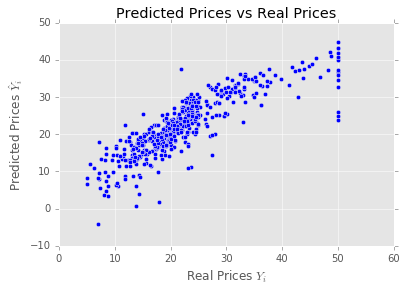

In [24]:
plt.scatter(boston_df.Price,boston_df.Predicted_Price)
plt.xlabel('Real Prices $Y_{i}$')
plt.ylabel('Predicted Prices $\hat{Y}_{i}$')
plt.title('Predicted Prices vs Real Prices')

In [27]:
S2 = np.mean((boston_df.Price - boston_df.Predicted_Price)**2)

In [29]:
print'Mean squared error (MSE): ',S2

Mean squared error (MSE):  21.8977792177


In [53]:
X.shape

(506, 13)

In [55]:
# Setting training and testing set manually
X_train = X[:-50]
X_test = X[-50:]
y_train = boston_df.Price[:-50]
y_test = boston_df.Price[-50:]
print X_train.shape,X_test.shape,y_train.shape,y_test.shape 

(456, 13) (50, 13) (456,) (50,)


In [65]:
# Setting training and testing set by sklearn
#from sklearn import cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X,
                                   boston_df.Price, test_size = 0.3, random_state = 5)
print X_train.shape,X_test.shape,y_train.shape,y_test.shape 

(354, 13) (152, 13) (354,) (152,)


In [66]:
sk_lm = LinearRegression()
sk_lm.fit(X_train, y_train)
pred_train = sk_lm.predict(X_train)
pred_test = sk_lm.predict(X_test)

In [68]:
pred_train[0:5]

array([ 12.89678318,  13.66280792,  26.42791958,  31.67834277,  11.06161818])

In [69]:
pred_test[0:5]

array([ 37.38786027,  31.56942953,  27.13758862,   6.54379609,  33.68990486])

In [71]:
boston_df.Price[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [72]:
MSE_training_set = np.mean((y_train - sk_lm.predict(X_train))**2)
MSE_testing_set = np.mean((y_test - sk_lm.predict(X_test))**2)
print 'MSE_training_set',MSE_training_set
print 'MSE_testing_set',MSE_testing_set

MSE_training_set 19.0715279659
MSE_testing_set 30.7032322072


# Residual plots

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.

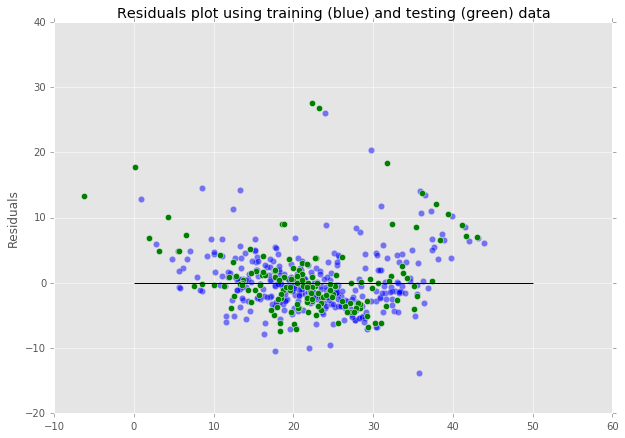

In [79]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(sk_lm.predict(X_train), y_train - sk_lm.predict(X_train), c = 'b', s = 40, alpha = 0.5)
plt.scatter(sk_lm.predict(X_test), y_test - sk_lm.predict(X_test), c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residuals plot using training (blue) and testing (green) data')
plt.ylabel('Residuals')

In [85]:
np.mean((y_train - sk_lm.predict(X_train))**2)

19.07152796585069

In [109]:
#LOGISTIC REGRESSION and Classification Accuracy
feature_select = ['CRIM', 'ZN', 'INDUS']
X_select = boston_df[feature_select]
#X_select[X_select['CHAS']>0]
y_select = boston_df['CHAS']#HOUSE CLOSE TO A RIVER

In [110]:
X_train_select, X_test_select, y_train_select, y_test_select = sklearn.cross_validation.train_test_split(X_select,
                                   y_select, test_size = 0.2, random_state = 1)
print X_train_select.shape,X_test_select.shape,y_train_select.shape,y_test_select.shape 

(404, 3) (102, 3) (404,) (102,)


In [117]:
from sklearn.linear_model import LogisticRegression
logistic_select = LogisticRegression()
logistic_select.fit(X_train_select, y_train_select)
Chas_predict = logistic_select.predict(X_test_select)

In [118]:
from sklearn import metrics
print 'Accuracy score', metrics.accuracy_score(y_test_select, Chas_predict)

Accuracy score 0.970588235294


In [122]:
y_test_select.value_counts()

0    99
1     3
Name: CHAS, dtype: int64

In [126]:
np.mean(y_test_select)#percentage of houses close to a river

0.029411764705882353

In [127]:
1-np.mean(y_test_select)#the model predict at 97% of the data the houses are far from a river(NULL ACCURACY)

0.9705882352941176

In [132]:
#The null accuaracy :
max(np.mean(y_test_select), 1-np.mean(y_test_select))

0.9705882352941176

In [138]:
#Comparaison of testing set and the predicted values(y train rarely used)
print 'True values',y_test_select.values[0:10]
print 'Pred values',Chas_predict[0:10]

True values [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Pred values [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
